In [78]:
import pandas as pd


df_ = pd.read_csv('data/train.csv').drop('id', axis=1)
print('df:', df_.shape)
df_orig = pd.read_csv('data/train-original.csv')
df_orig['Depression'] = df_orig['Depression'].map({'0': 0, '1': 1, 'Yes': 1, 'No': 0})
print('df_orig:', df_orig.shape)

df = pd.concat([df_, df_orig], axis=0, ignore_index=True)
print('df:', df.shape)

df: (140700, 19)
df_orig: (2556, 19)
df: (143256, 19)


In [79]:
df['Depression'].value_counts()

Depression
0    117234
1     26022
Name: count, dtype: int64

In [80]:
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


In [81]:
categorical_cols = ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numerical_cols = df.columns.difference(categorical_cols + ['Depression'])

In [82]:
df[categorical_cols].head()

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Aaradhya,Female,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Vivan,Male,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Yuvraj,Male,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,No
3,Yuvraj,Male,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Rhea,Female,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes


In [83]:
df[numerical_cols].head()

,Academic Pressure,Age,CGPA,Financial Stress,Job Satisfaction,Study Satisfaction,Work Pressure,Work/Study Hours
0,NaN,49.0,NaN,2.0,2.0,NaN,5.0,1.0
1,NaN,26.0,NaN,3.0,3.0,NaN,4.0,7.0
2,5.0,33.0,8.97,1.0,NaN,2.0,NaN,3.0
3,NaN,22.0,NaN,1.0,1.0,NaN,5.0,10.0
4,NaN,30.0,NaN,4.0,1.0,NaN,1.0,9.0


In [84]:
# fill numerical columns with 0
df[numerical_cols] = df[numerical_cols].fillna(0)

# Handle categorical columns

## Name

In [85]:
df['Name'].unique()

array(['Aaradhya', 'Vivan', 'Yuvraj', 'Rhea', 'Vani', 'Ritvik', 'Rajveer',
       'Aishwarya', 'Simran', 'Utkarsh', 'Aahana', 'Tejas', 'Aadhya',
       'Kiran', 'Aditi', 'Suhani', 'Jiya', 'Bhavesh', 'Armaan', 'Ishaani',
       'Prachi', 'Pratyush', 'Abhinav', 'Siddhesh', 'Aditya', 'Aarav',
       'Asha', 'Kashish', 'Prisha', 'Chhavi', 'Tanmay', 'Vihaan', 'Shiv',
       'Anvi', 'Darsh', 'Samar', 'Raunak', 'Mahi', 'Shaurya', 'Vidya',
       'Jai', 'Ayush', 'Ansh', 'Anand', 'Yashvi', 'Shrey', 'Ritika',
       'Mihir', 'Isha', 'Arjun', 'Rohan', 'Pratham', 'Nirvaan', 'Ishaan',
       'Aarya', 'Riya', 'Aariv', 'Raghavendra', 'Mahika', 'Abhishek',
       'Harshil', 'Janvi', 'Kartikeya', 'Shivam', 'Advait', 'Reyansh',
       'Saanvi', 'Ivaan', 'Pallavi', 'Sneha', 'Ayaan', 'Aakash', 'Raghav',
       'Satyam', 'Aarush', 'Vibha', 'Rupal', 'Sanya', 'Mira', 'Rashi',
       'Shlok', 'Harsha', 'Divya', 'Pranav', 'Hrithik', 'Tushar',
       'Garima', 'Zoya', 'Kian', 'Navya', 'Lakshay', 'Kriti', 'Palak

## Gender

In [86]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## City

In [87]:
df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

There seems to be a lot of values that are not city names.

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, col):
    # Get the value counts of cities
    city_counts = df[col].value_counts()

    # Set up the plot style and size
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Create the bar plot
    ax = sns.barplot(x=city_counts.index, y=city_counts.values)

    # Customize the plot
    plt.title(f'Distribution of {col}', fontsize=20)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, ha='right')

    # Add value labels on top of each bar
    for i, v in enumerate(city_counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

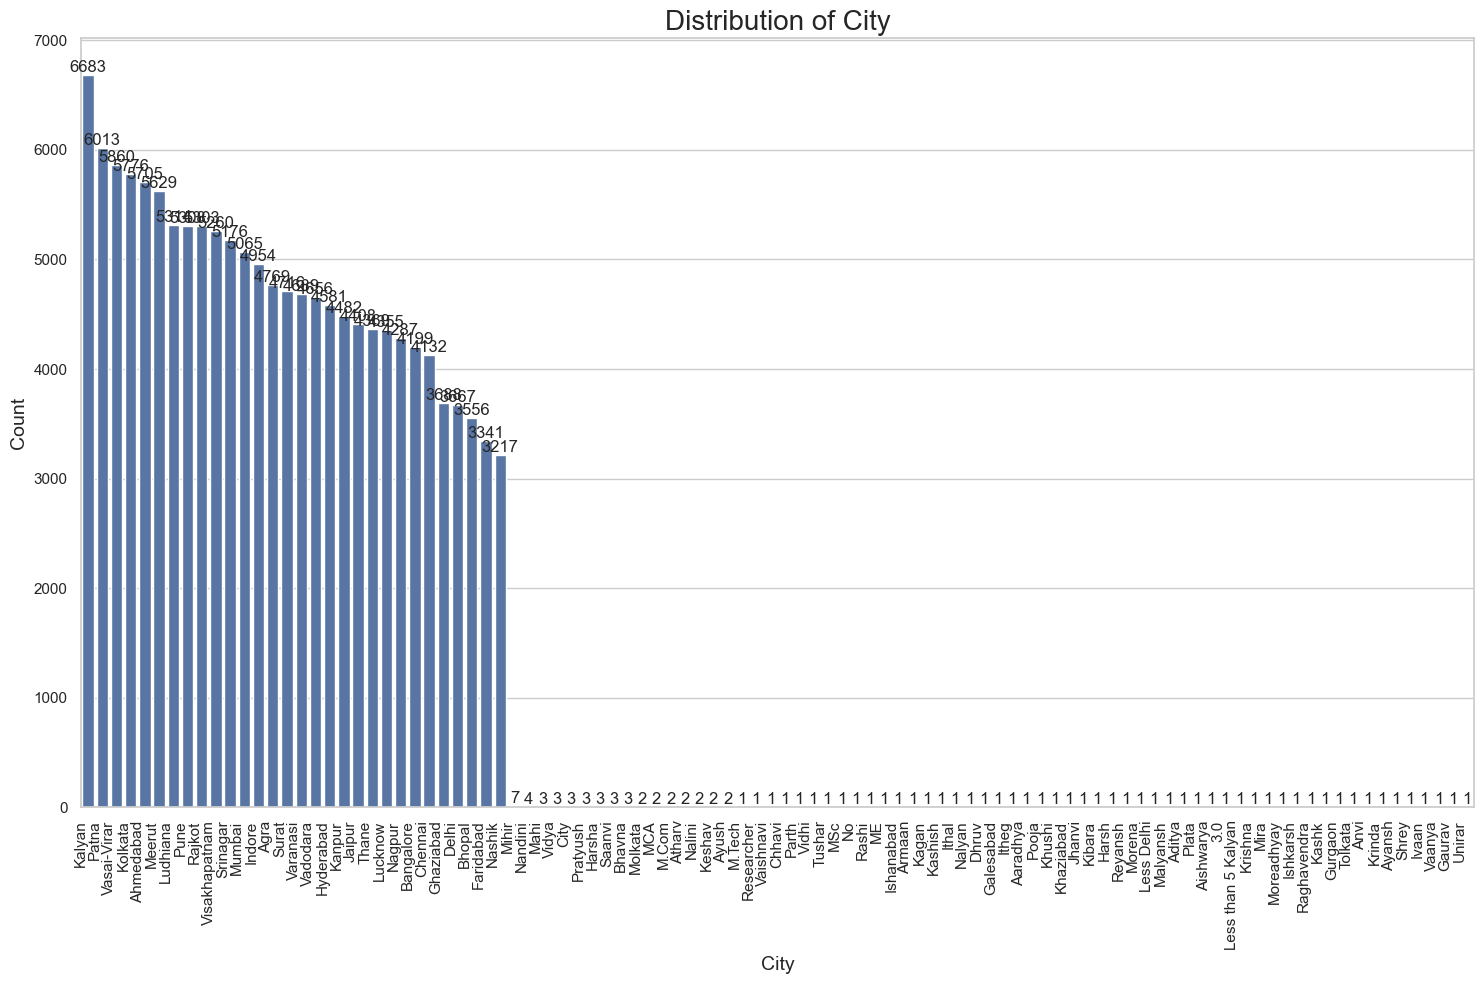

In [89]:
plot_distribution(df, 'City')

We can discard all rows with count <= 7.

In [90]:
value_counts = df['City'].value_counts()
cities_to_keep = value_counts[value_counts > 7].index
df = df[df['City'].isin(cities_to_keep)]

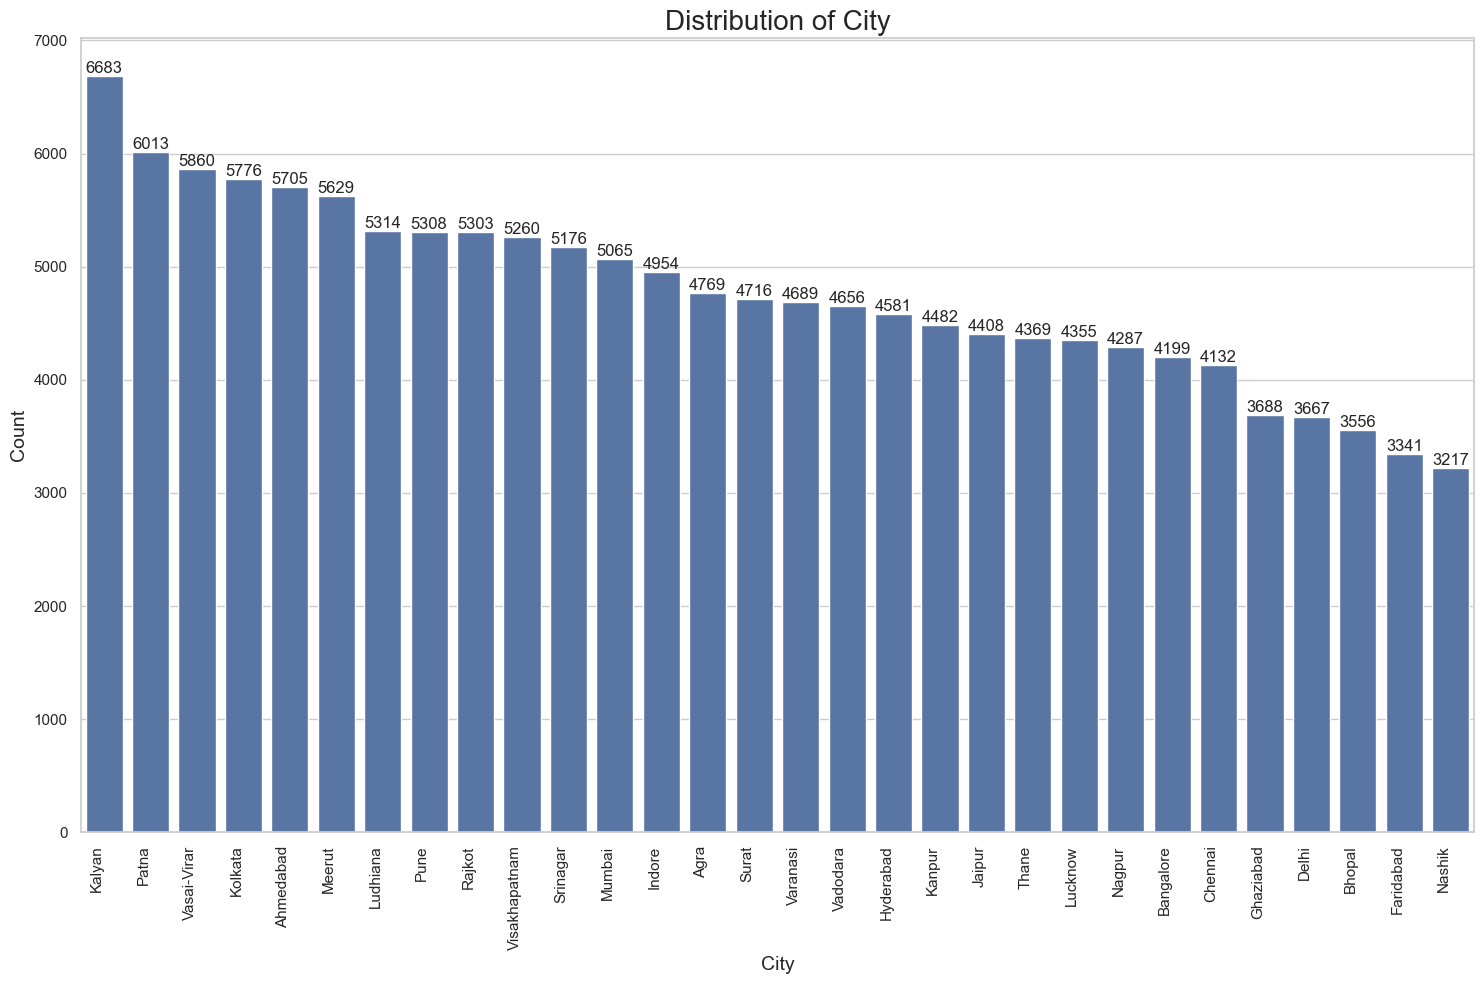

In [91]:
plot_distribution(df, 'City')

In [92]:
df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore'], dtype=object)

## Working Professional or Student

In [93]:
df['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

## Profession

In [94]:
df['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

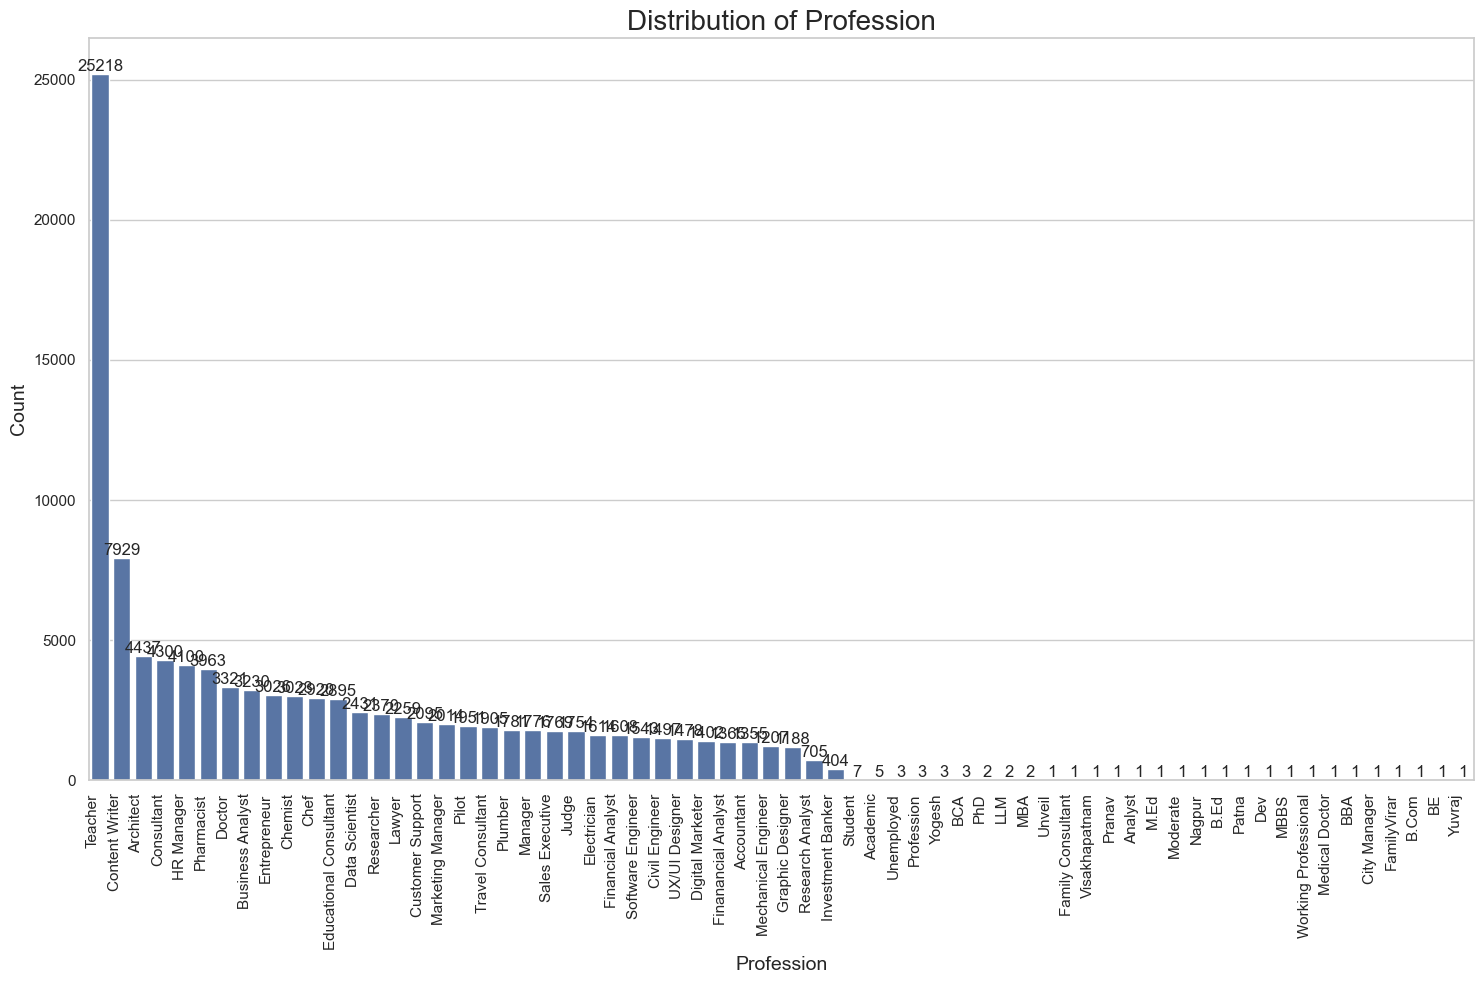

In [95]:
plot_distribution(df, 'Profession')

Again, we can discard all rows with count <= 7.

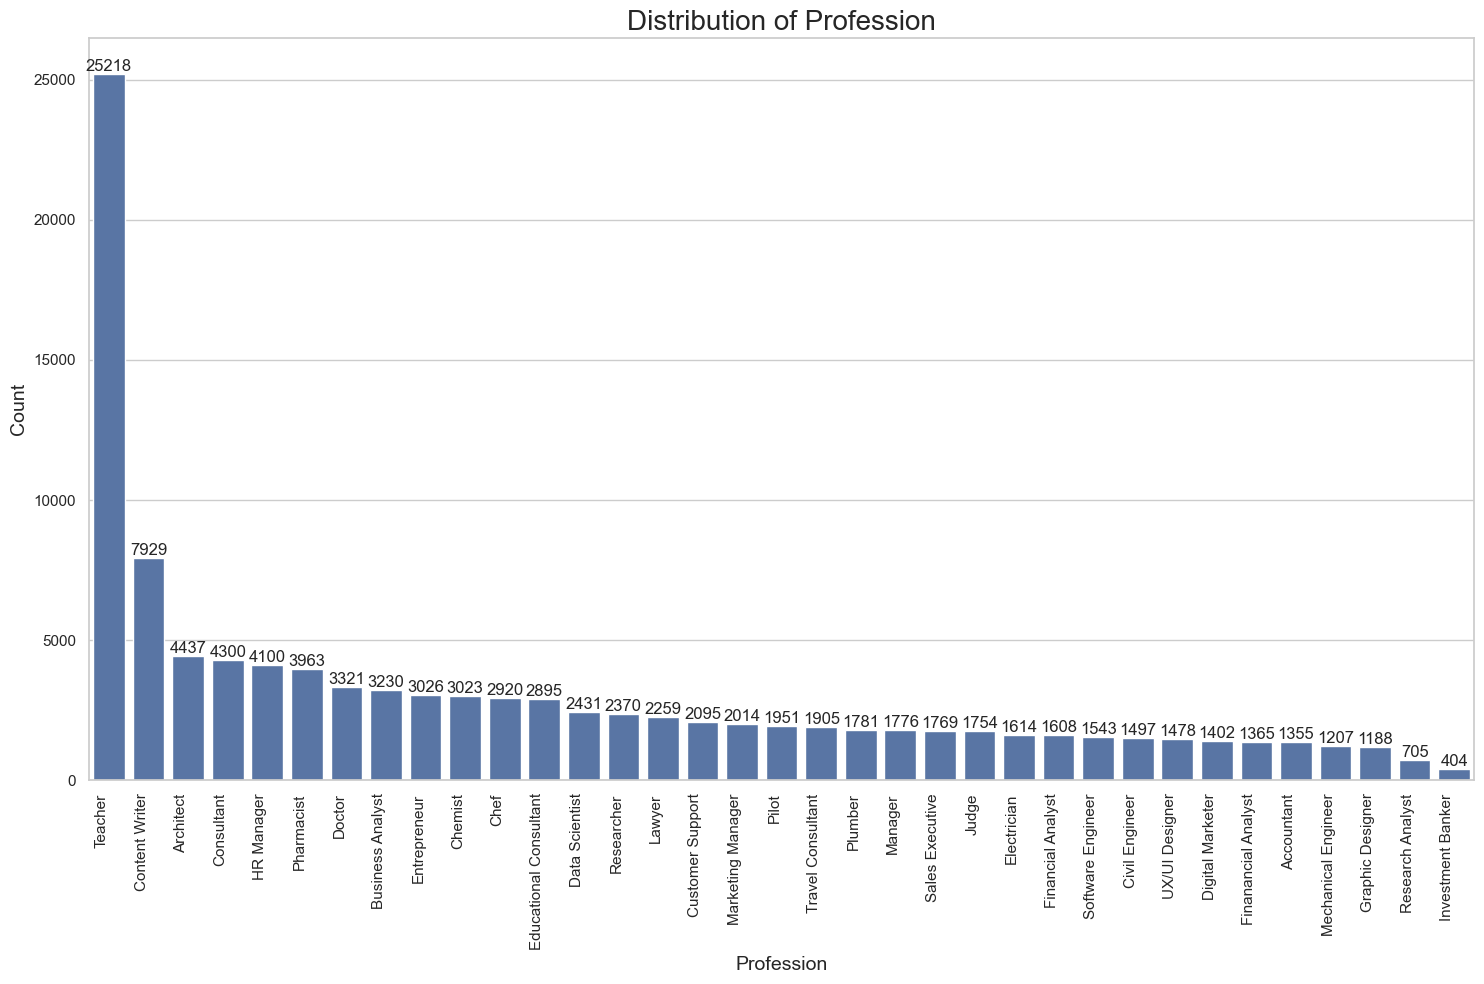

In [96]:
value_counts = df['Profession'].value_counts()
professions_to_keep = value_counts[value_counts > 7].index
df = df[df['Profession'].isin(professions_to_keep)]

plot_distribution(df, 'Profession')

## Sleep duration

In [97]:
df['Sleep Duration']

0         More than 8 hours
1         Less than 5 hours
3         Less than 5 hours
4                 5-6 hours
5                 5-6 hours
                ...        
143250    Less than 5 hours
143251            5-6 hours
143252    Less than 5 hours
143253    Less than 5 hours
143254            7-8 hours
Name: Sleep Duration, Length: 105833, dtype: object

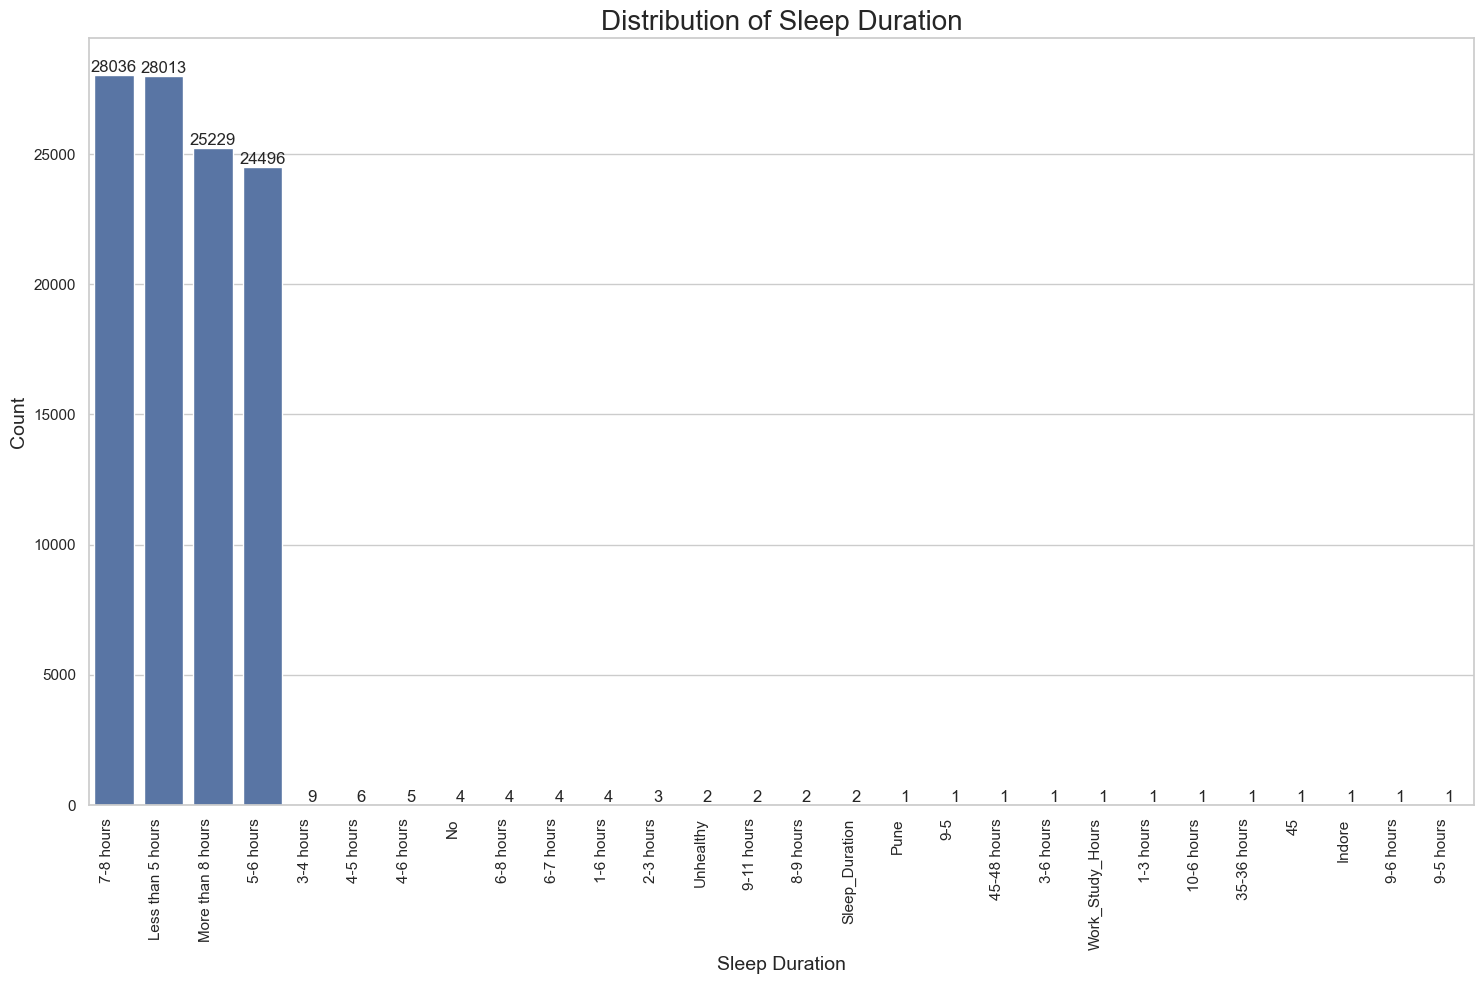

In [98]:
plot_distribution(df, 'Sleep Duration')

Again, there seems to be some data entry issues with abnormal values, we can discard them.

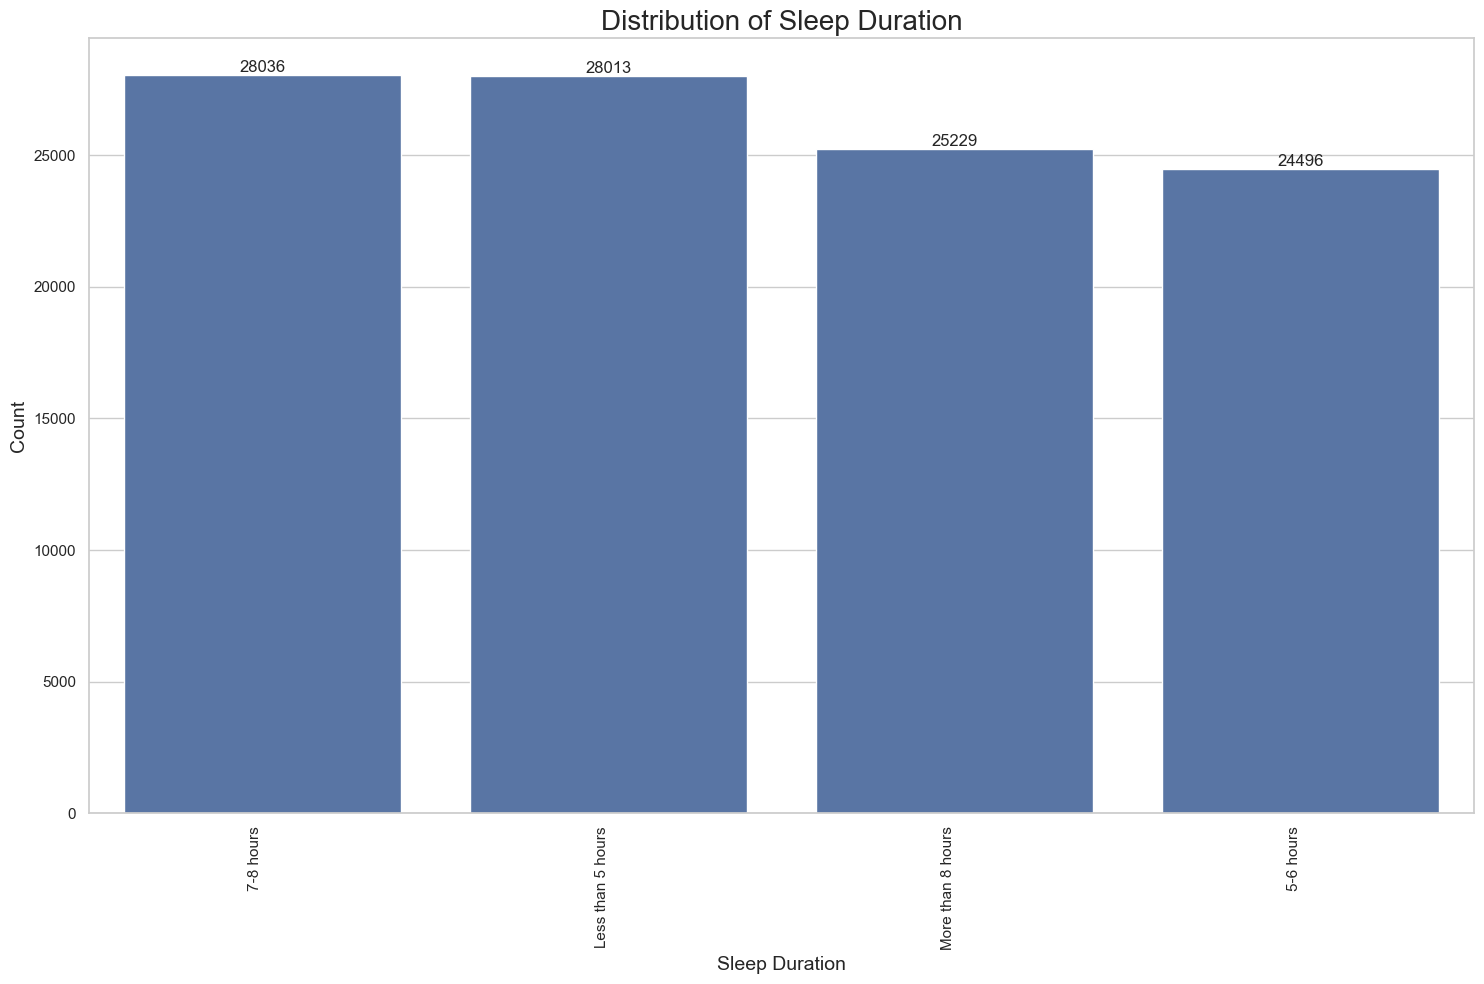

In [99]:
value_counts = df['Sleep Duration'].value_counts()
sleep_durations_to_keep = value_counts[value_counts > 9].index
df = df[df['Sleep Duration'].isin(sleep_durations_to_keep)]

plot_distribution(df, 'Sleep Duration')

## Dietary Habits

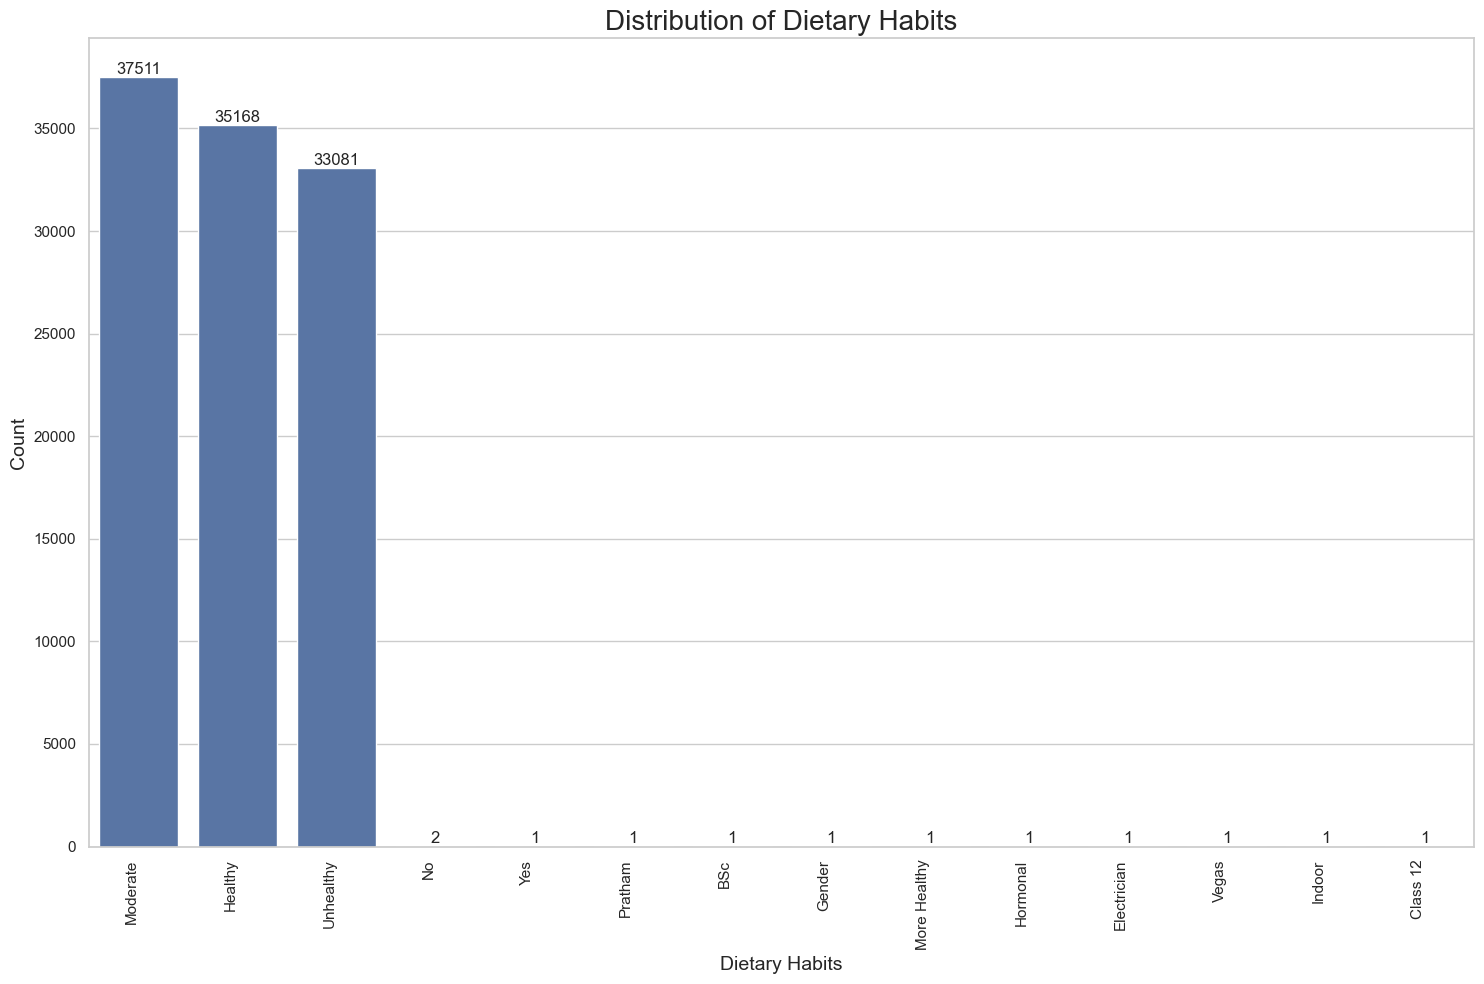

In [100]:
plot_distribution(df, 'Dietary Habits')

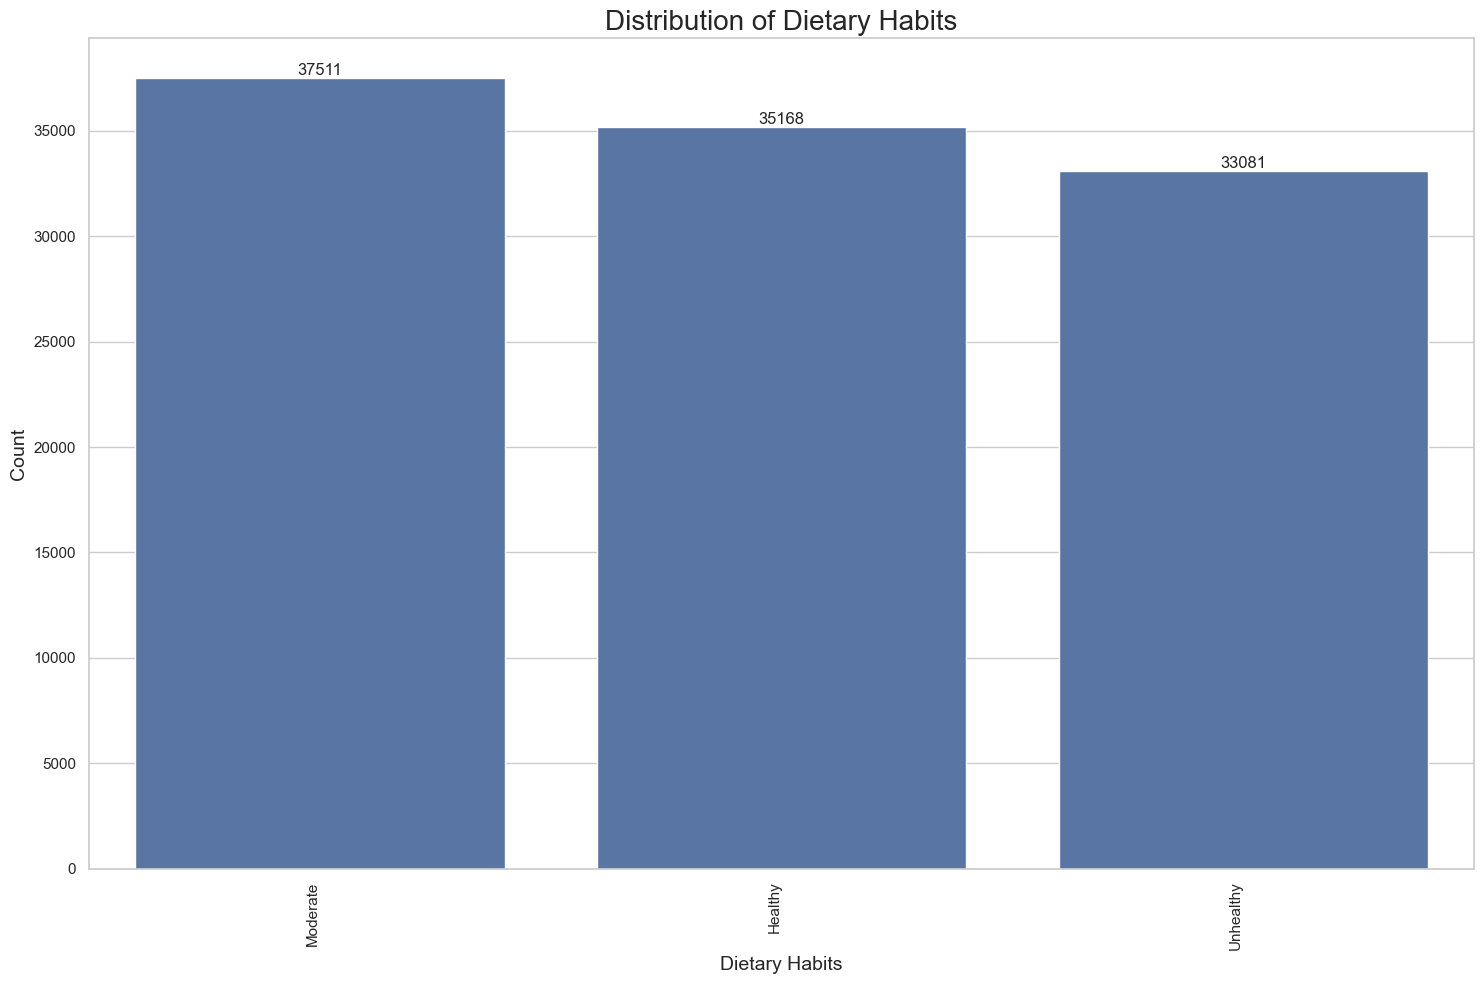

In [101]:
value_counts = df['Dietary Habits'].value_counts()
dietary_habits_to_keep = value_counts[value_counts > 2].index
df = df[df['Dietary Habits'].isin(dietary_habits_to_keep)]

plot_distribution(df, 'Dietary Habits')

## Degree

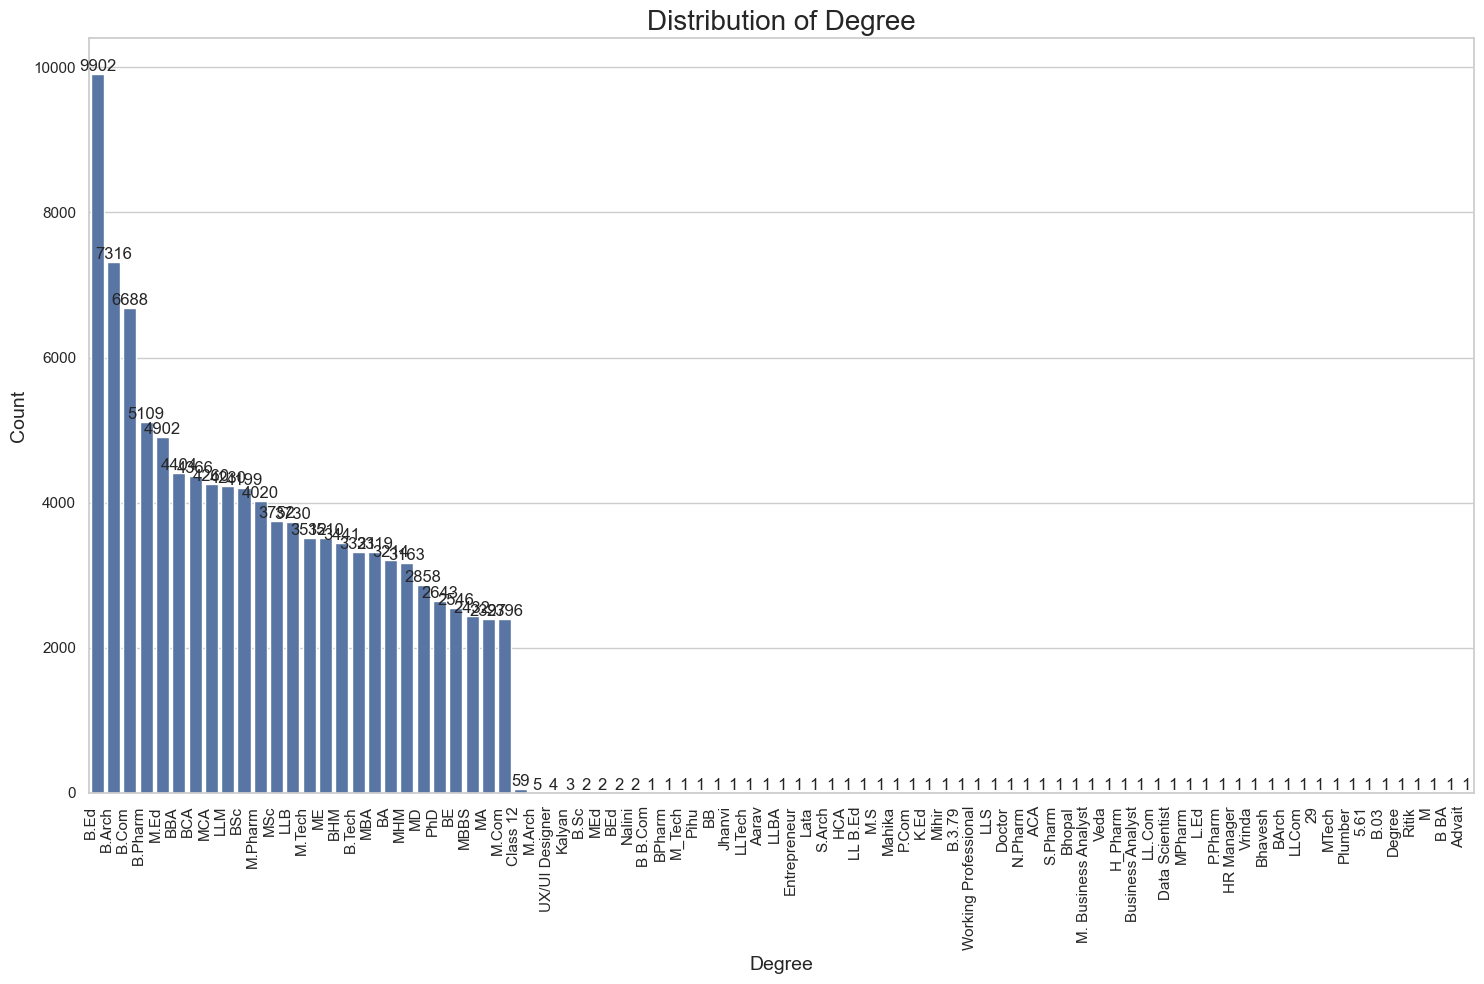

In [102]:
plot_distribution(df, 'Degree')

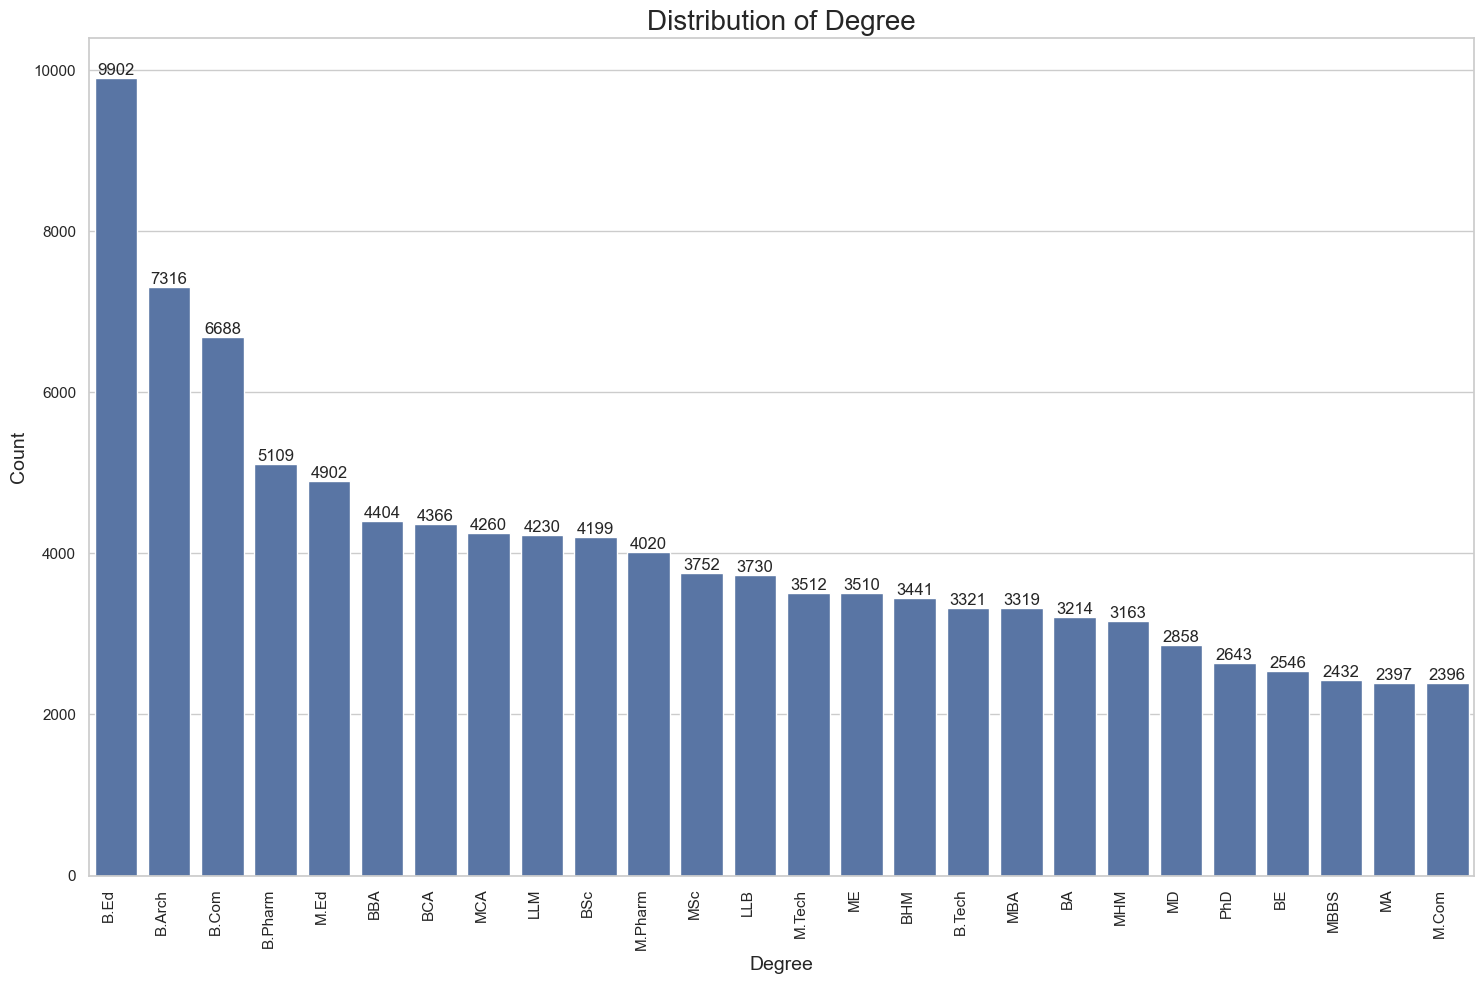

In [103]:
value_counts = df['Degree'].value_counts()
degrees_to_keep = value_counts[value_counts > 59].index
df = df[df['Degree'].isin(degrees_to_keep)]

plot_distribution(df, 'Degree')

## Have you ever had suicidal thoughts ?

In [104]:
df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

## Family History of Mental Illness

In [105]:
df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

# Check for missing values

In [106]:
df[categorical_cols].isnull().sum()

Name                                     0
Gender                                   0
City                                     0
Working Professional or Student          0
Profession                               0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Family History of Mental Illness         0
dtype: int64

In [107]:
df[numerical_cols].isnull().sum()

Academic Pressure     0
Age                   0
CGPA                  0
Financial Stress      0
Job Satisfaction      0
Study Satisfaction    0
Work Pressure         0
Work/Study Hours      0
dtype: int64

In [108]:
numerical_cols_with_zero = df[numerical_cols].eq(0).all(axis=0)
print('Numerical columns with all values equal to 0:')
print(numerical_cols_with_zero[numerical_cols_with_zero].index.tolist())

Numerical columns with all values equal to 0:
[]


In [109]:
df.to_csv('data/train-clean.csv', index=False)

In [110]:
df

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.0,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.0,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.0,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,0.0,2.0,0.0,0.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143250,Prisha,Female,45.0,Srinagar,Working Professional,Teacher,0.0,1.0,0.0,0.0,3.0,Less than 5 hours,Healthy,LLM,Yes,2.0,5.0,Yes,0
143251,Raghavendra,Male,25.0,Bangalore,Working Professional,Consultant,0.0,1.0,0.0,0.0,5.0,5-6 hours,Healthy,BBA,Yes,12.0,3.0,Yes,0
143252,Pihu,Female,23.0,Pune,Working Professional,Teacher,0.0,3.0,0.0,0.0,1.0,Less than 5 hours,Moderate,MA,Yes,8.0,3.0,No,1
143253,Sara,Female,24.0,Srinagar,Working Professional,HR Manager,0.0,1.0,0.0,0.0,4.0,Less than 5 hours,Moderate,BA,Yes,4.0,4.0,No,0
